In [0]:
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#!apt-get install python-opencv

    100% |████████████████████████████████| 993kB 5.3MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
 auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1zfiWC95clhdPcGrlHisvlUn0-uq1Q2CS'})
download.GetContentFile('butterfly.npy')

In [0]:
!ls


adc.json			     dcgan_generated_image_epoch_-4.png
butterfly.npy			     dcgan_generated_image_epoch_4.png
cruise ship.npy			     dcgan_generated_image_epoch_500.png
data				     dcgan_generated_image_epoch_501.png
dcgan_discriminator_epoch_1.h5	     dcgan_generated_image_epoch_50.png
dcgan_discriminator_epoch_2.h5	     dcgan_generated_image_epoch_51.png
dcgan_discriminator_epoch_3.h5	     dcgan_generated_image_epoch_550.png
dcgan_discriminator_epoch_4.h5	     dcgan_generated_image_epoch_551.png
dcgan_discriminator_epoch_5.h5	     dcgan_generated_image_epoch_-5.png
dcgan_generated_image_epoch_0.png    dcgan_generated_image_epoch_5.png
dcgan_generated_image_epoch_100.png  dcgan_generated_image_epoch_600.png
dcgan_generated_image_epoch_101.png  dcgan_generated_image_epoch_601.png
dcgan_generated_image_epoch_150.png  dcgan_generated_image_epoch_650.png
dcgan_generated_image_epoch_151.png  dcgan_generated_image_epoch_651.png
dcgan_generated_image_epoch_-1.png   dcgan_generated_image_epoch_7

In [0]:
import numpy as np

In [0]:
data=np.load('bird.npy')

In [0]:
data.shape

(117999, 784)

In [0]:
data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        19, 191,  51,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  10, 216, 230,  28,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  34, 235, 206,  11,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  66, 250, 174,   1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,  70, 145, 138, 115,  54,   3,   0,   0, 10

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [0]:
from PIL import Image
from scipy.misc import toimage
c=np.reshape(data[90], (28, 28))
d=np.squeeze(np.dstack([c,c,c]))
img=Image.fromarray(d).convert('RGBA')

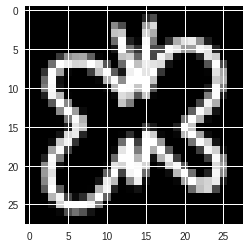

In [0]:
imgplot = plt.imshow(img)

In [0]:
X_train=(np.reshape(data, (-1,28, 28)))
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train[:, np.newaxis, :, :]
global xw,xz
xw=0
xz=0

In [0]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
#from tqdm import tqdm
import matplotlib.pyplot as plt

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers

K.set_image_dim_ordering('th')
K.tensorflow_backend._get_available_gpus()
#print(device_lib.list_local_devices())
# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 100

# Load MNIST data
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train = (X_train.astype(np.float32) - 127.5)/127.5
# X_train = X_train[:, np.newaxis, :, :]

# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)

# Generator
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Reshape((128, 7, 7)))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(64, kernel_size=(5, 5), padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=adam)

# Discriminator
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', input_shape=(1, 28, 28), kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=(5, 5), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

# Combined network
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)

dLosses = []
gLosses = []

Using TensorFlow backend.


In [0]:

global xz
global xw
# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('%d.png' % epoch)

# Create a wall of generated MNIST images
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i, 0], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('./%d.png' % epoch)
def plotGeneratedImage(epoch):
    examples=1
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    plt.figure(figsize=(28,28))
    #plt.subplot(dim[0], dim[1], i+1)
    plt.imshow(generatedImages[0, 0])
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('./T%d.png' % epoch)
# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
    generator.save('./dcgan_generator_epoch_%d.h5' % epoch)
    discriminator.save('./dcgan_discriminator_epoch_%d.h5' % epoch)

def train(epochs=1, batchSize=128):
    batchCount = X_train.shape[0] // batchSize
    print( 'Epochs:', epochs)
    print('Batch size:', batchSize)
    print('Batches per epoch:', batchCount)
    xw=0
    for e in range(1, epochs+1):
        print( '-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(batchCount):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # Generate fake MNIST images
            generatedImages = generator.predict(noise)
            X = np.concatenate([imageBatch, generatedImages])

            # Labels for generated and real data
            yDis = np.zeros(2*batchSize)
            # One-sided label smoothing
            yDis[:batchSize] = 0.9

            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)
            #print('discriminator training')
            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)
            if(_%10==0):
              print('Done:',_)
              plotGeneratedImages(xw)
              plotGeneratedImage(xw)
              xw+=1
#               plotGeneratedImages(_+1+e,examples=1)
        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)
        plotGeneratedImages(-e)

        if( e == 1 or e % 1 == 0):
            #plotGeneratedImages(e)
            saveModels(e)
            plotGeneratedImages(e)
    # Plot losses from every epoch
    plotLoss(e)
train(100, 128)
 

Epochs: 100
Batch size: 128
Batches per epoch: 1043
--------------- Epoch 1 ---------------
Done: 0
Done: 10
Done: 20
Done: 30
Done: 40
Done: 50
Done: 60
Done: 70
Done: 80
Done: 90
Done: 100


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Done: 110
Done: 120
Done: 130
Done: 140
Done: 150
Done: 160
Done: 170
Done: 180
Done: 190
Done: 200
Done: 210
Done: 220
Done: 230
Done: 240
Done: 250
Done: 260
Done: 270
Done: 280
Done: 290
Done: 300
Done: 310
Done: 320
Done: 330
Done: 340
Done: 350
Done: 360
Done: 370
Done: 380
Done: 390
Done: 400
Done: 410
Done: 420
Done: 430
Done: 440
Done: 450
Done: 460
Done: 470
Done: 480
Done: 490
Done: 500
Done: 510
Done: 520
Done: 530
Done: 540
Done: 550
Done: 560
Done: 570
Done: 580
Done: 590
Done: 600
Done: 610
Done: 620
Done: 630
Done: 640
Done: 650
Done: 660
Done: 670
Done: 680
Done: 690
Done: 700
Done: 710
Done: 720
Done: 730
Done: 740
Done: 750
Done: 760
Done: 770
Done: 780
Done: 790
Done: 800
Done: 810
Done: 820
Done: 830
Done: 840
Done: 850
Done: 860
Done: 870
Done: 880
Done: 890
Done: 900
Done: 910
Done: 920
Done: 930
Done: 940
Done: 950
Done: 960
Done: 970
Done: 980
Done: 990
Done: 1000
Done: 1010
Done: 1020
Done: 1030
Done: 1040
--------------- Epoch 2 ---------------
Done: 0
Done: 1